## 单变量线性回归

In [176]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [178]:
path = 'regress_data1.csv' # 导入训练数据路径
data = pd.read_csv(path)  # 导入训练数据
print(data)
data.head()

         人口        收益
0    6.1101  17.59200
1    5.5277   9.13020
2    8.5186  13.66200
3    7.0032  11.85400
4    5.8598   6.82330
..      ...       ...
92   5.8707   7.20290
93   5.3054   1.98690
94   8.2934   0.14454
95  13.3940   9.05510
96   5.4369   0.61705

[97 rows x 2 columns]


,人口,收益
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [159]:
data.describe()

,人口,收益
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


看下数据长什么样子

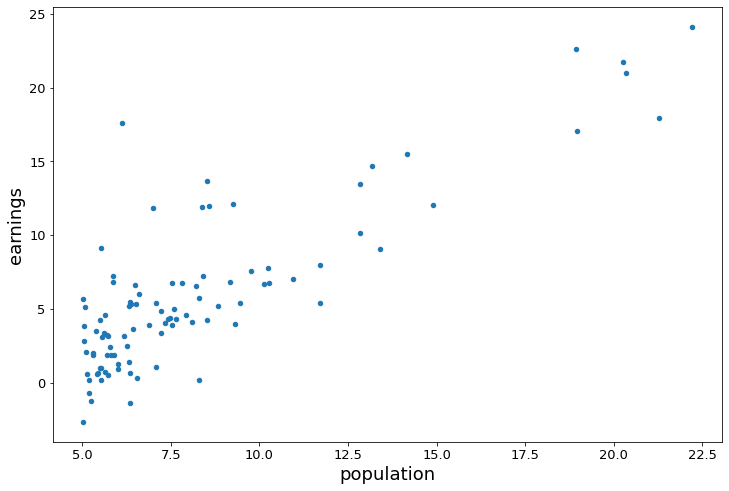

In [185]:
data.plot(kind='scatter', x='人口', y='收益', figsize=(12,8)) # 画出训练数据的散点图
plt.xlabel('population', fontsize=18) # 绘制x轴
plt.ylabel('earnings', fontsize=18) # 绘制y轴
plt.show()

现在让我们使用梯度下降来实现线性回归，以最小化代价函数。 

首先，我们将创建一个以参数$w$为特征函数的代价函数
$$J\left( w  \right)=\frac{1}{2m}\sum\limits_{i=1}^{m}{{{\left( {{h}}\left( {{x}^{(i)}} \right)-{{y}^{(i)}} \right)}^{2}}}$$
其中：\\[{{h}}\left( x \right)={{w}^{T}}X={{w }_{0}}{{x}_{0}}+{{w }_{1}}{{x}_{1}}+{{w }_{2}}{{x}_{2}}+...+{{w }_{n}}{{x}_{n}}\\] 

In [184]:
def computeCost(X, y, w):
    inner =  np.power(((X * w.T) - y), 2)# (m,n) @ (n, 1) -> (n, 1)
#     return np.sum(inner) / (2 * len(X))
    return np.sum(inner) / (2 * X.shape[0])

让我们在训练集中添加一列，以便我们可以使用向量化的解决方案来计算代价和梯度。

In [186]:
data.insert(loc=0, column='Ones', value=1)
data

,Ones,人口,收益
0,1,6.1101,17.59200
1,1,5.5277,9.13020
2,1,8.5186,13.66200
3,1,7.0032,11.85400
4,1,5.8598,6.82330
...,...,...,...
92,1,5.8707,7.20290
93,1,5.3054,1.98690
94,1,8.2934,0.14454
95,1,13.3940,9.05510


现在我们来做一些变量初始化。

In [187]:
# set X (training data) and y (target variable)
cols = data.shape[1]
print(data.shape)
X = data.iloc[:,:cols-1] # X是所有行，去掉最后一列
y = data.iloc[:,cols-1:] # y是所有行，最后一列

(97, 3)


观察下 X (训练集) and y (目标变量)是否正确.

In [188]:
X.head()#head()是观察前5行

,Ones,人口
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [189]:
y.head()

,收益
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


代价函数是应该是numpy矩阵，所以我们需要转换X和Y，然后才能使用它们。 我们还需要初始化w。

In [190]:
X = np.matrix(X.values)
y = np.matrix(y.values)
w = np.matrix(np.array([0,0]))

w 是一个(1,2)矩阵

In [191]:
w

matrix([[0, 0]])

看下维度

In [192]:
X.shape, w.shape, y.shape

((97, 2), (1, 2), (97, 1))

计算代价函数 (theta初始值为0).

In [193]:
computeCost(X, y, w)

32.072733877455676

# Batch Gradient Decent（批量梯度下降）

$${{w }_{j}}:={{w }_{j}}- \alpha \frac{1}{m}\sum\limits_{i=1}^m \frac{\partial }{\partial {{w}_{j}}}J\left( w \right)$$

In [194]:
def batch_gradientDescent(X, y, w, alpha, iters):
    temp = np.matrix(np.zeros(w.shape)) # 生成一个维数与参数矩阵w相同的numpy全零矩阵，用于存储参数的值
    parameters = int(w.ravel().shape[1]) # 获取参数个数
    cost = np.zeros(iters) # 生成一个与迭代次数相同的全零数组，用于存储代价函数值

    for i in range(iters):
        error = (X * w.T) - y

        for j in range(parameters):
            term = np.multiply(error, X[:, j])
            temp[0, j] = w[0, j] - ((alpha / len(X)) * np.sum(term))

        w = temp
        cost[i] = computeCost(X, y, w)

    return w, cost

初始化一些附加变量 - 学习速率α和要执行的迭代次数。

In [195]:
alpha = 0.01
iters = 1000 

现在让我们运行梯度下降算法来将我们的参数θ适合于训练集。

In [196]:
g, cost = batch_gradientDescent(X, y, w, alpha, iters)
g

matrix([[-3.24140214,  1.1272942 ]])

最后，我们可以使用我们拟合的参数计算训练模型的代价函数（误差）。

In [197]:
computeCost(X, y, g)

4.515955503078914

现在我们来绘制线性模型以及数据，直观地看出它的拟合。

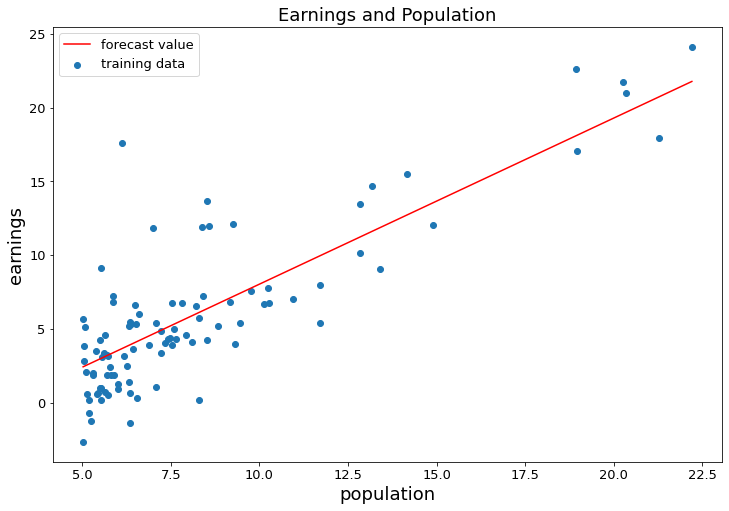

In [172]:
x = np.linspace(data['人口'].min(), data['人口'].max(), 100) # 依照定义间隔生成均匀分布的数值
f = g[0, 0] + (g[0, 1] * x) # 写入公式f = a + bx，w=[a,b]

fig, ax = plt.subplots(figsize=(12, 8)) 
# 其中figsize用来设置图形的大小，fig代表绘图窗口(Figure)；ax代表这个绘图窗口上的坐标系(axis)，后面继续对ax进行操作。
ax.plot(x, f, 'r', label='forecast value') # 生成预测曲线以及标签
ax.scatter(data['人口'], data['收益'], label='training data') # 生成训练数据的散点图以及标签
ax.legend(loc=2) # 在图上标明一个图例，用于说明每条曲线的文字显示
ax.set_xlabel('population', fontsize=18) # x轴添加标签
ax.set_ylabel('earnings',  fontsize=18) # y轴添加标签
ax.set_title('Earnings and Population', fontsize=18) # 添加标题
plt.show()

由于梯度方程式函数也在每个训练迭代中输出一个代价的向量，所以我们也可以绘制。 请注意，代价总是降低 - 这是凸优化问题的一个例子。

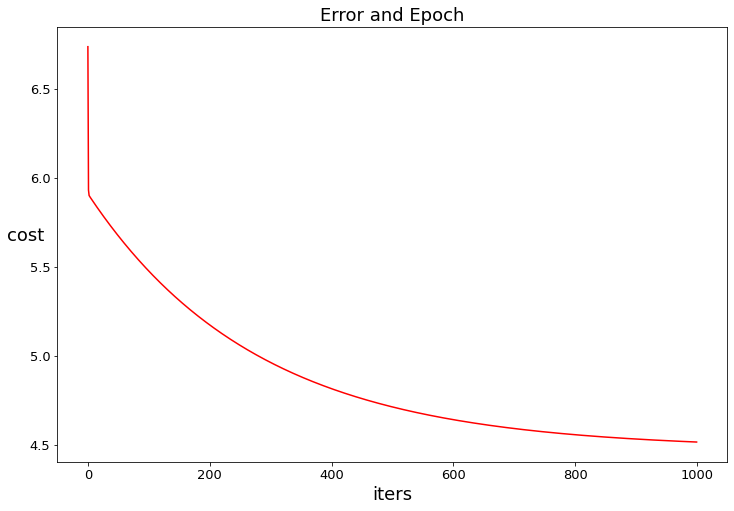

In [173]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(np.arange(iters), cost, 'r') # 将迭代次数以及代价函数值分别作为x和y轴
ax.set_xlabel('iters', fontsize=18)
ax.set_ylabel('cost', rotation=0, fontsize=18)
ax.set_title('Error and Epoch', fontsize=18)
plt.show()

## 多变量线性回归

练习还包括一个房屋价格数据集，其中有2个变量（房子的大小，卧室的数量）和目标（房子的价格）。 我们使用我们已经应用的技术来分析数据集。

In [198]:
path = 'regress_data2.csv'
data2 = pd.read_csv(path)
print(data2)
data2.head()

      面积  房间数      价格
0   2104    3  399900
1   1600    3  329900
2   2400    3  369000
3   1416    2  232000
4   3000    4  539900
5   1985    4  299900
6   1534    3  314900
7   1427    3  198999
8   1380    3  212000
9   1494    3  242500
10  1940    4  239999
11  2000    3  347000
12  1890    3  329999
13  4478    5  699900
14  1268    3  259900
15  2300    4  449900
16  1320    2  299900
17  1236    3  199900
18  2609    4  499998
19  3031    4  599000
20  1767    3  252900
21  1888    2  255000
22  1604    3  242900
23  1962    4  259900
24  3890    3  573900
25  1100    3  249900
26  1458    3  464500
27  2526    3  469000
28  2200    3  475000
29  2637    3  299900
30  1839    2  349900
31  1000    1  169900
32  2040    4  314900
33  3137    3  579900
34  1811    4  285900
35  1437    3  249900
36  1239    3  229900
37  2132    4  345000
38  4215    4  549000
39  2162    4  287000
40  1664    2  368500
41  2238    3  329900
42  2567    4  314000
43  1200    3  299000
44   852  

,面积,房间数,价格
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


对于此任务，我们添加了另一个预处理步骤 - 特征归一化。 这个对于pandas来说很简单

In [199]:
data2 = (data2 - data2.mean()) / data2.std()
data2.head()

,面积,房间数,价格
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


现在我们重复第1部分的预处理步骤，并对新数据集运行线性回归程序。

In [200]:
# add ones column
data2.insert(0, 'Ones', 1)

# set X (training data) and y (target variable)
cols = data2.shape[1]
X2 = data2.iloc[:,0:cols-1]
y2 = data2.iloc[:,cols-1:cols]

# convert to matrices and initialize theta
X2 = np.matrix(X2.values)
y2 = np.matrix(y2.values)
w2 = np.matrix(np.array([0,0,0]))

# perform linear regression on the data set
g2, cost2 = batch_gradientDescent(X2, y2, w2, alpha, iters)

# get the cost (error) of the model
computeCost(X2, y2, g2)

0.13070336960771892

我们也可以快速查看这一个的训练进程。

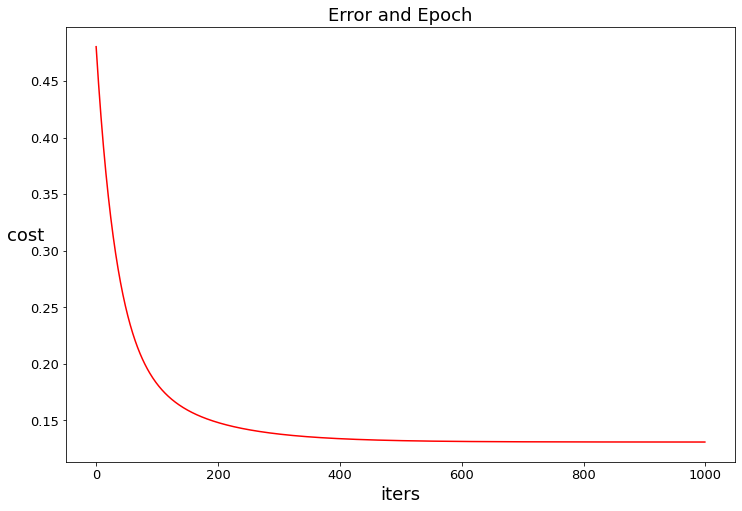

In [201]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost2, 'r')
ax.set_xlabel('iters', fontsize=18)
ax.set_ylabel('cost', rotation=0, fontsize=18)
ax.set_title('Error and Epoch', fontsize=18)
plt.show()

我们也可以使用scikit-learn的线性回归函数，而不是从头开始实现这些算法。 我们将scikit-learn的线性回归算法应用于第1部分的数据，并看看它的表现。

In [137]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)

LinearRegression()

scikit-learn model的预测表现

/Users/zhangzilun/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 39044 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/zhangzilun/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 27979 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/zhangzilun/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 25910 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/zhangzilun/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 30410 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/zhangzilun/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 21644 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/zhangzilun/opt/anaconda3/lib/pyth

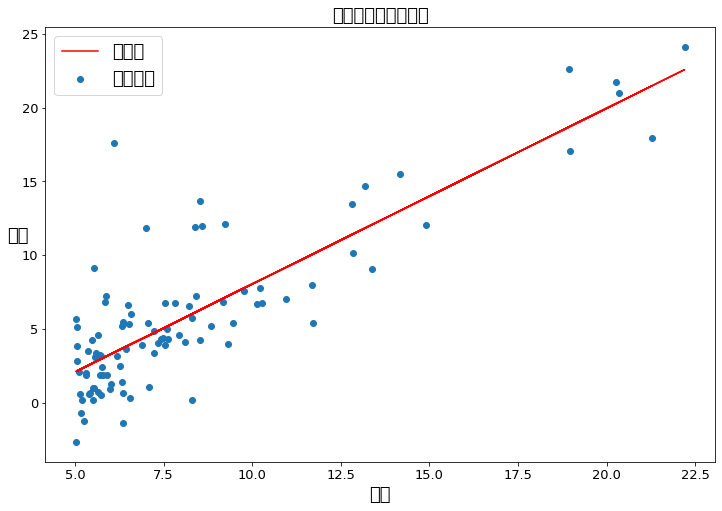

In [202]:
x = np.array(X[:, 1].A1) # 将人口数据展平转换为array数组并赋给x
f = model.predict(X).flatten()

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(x, f, 'r', label='预测值')
ax.scatter(data['人口'], data['收益'], label='训练数据')
ax.legend(loc=2, fontsize=18)
ax.set_xlabel('人口', fontsize=18)
ax.set_ylabel('收益', rotation=0, fontsize=18)
ax.set_title('预测收益和人口规模', fontsize=18)
plt.show()

## $L_2$正则化
$J (  { w } ) = \frac { 1 } { 2 } \sum _ { i = 1 } ^ { m } ( h _ { w} ( x ^ { ( i ) } ) - y ^ { ( i ) } ) ^ { 2 } + \lambda \sum _ { j = 1 } ^ { n } w_ { j } ^ { 2 }$，此时称作`Ridge Regression`：

In [36]:
from sklearn.linear_model import Ridge
model = Ridge()
model.fit(X, y)

Ridge()

/Users/zhangzilun/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 39044 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/zhangzilun/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 27979 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/zhangzilun/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 25910 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/zhangzilun/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 30410 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/zhangzilun/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 21644 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/zhangzilun/opt/anaconda3/lib/pyth

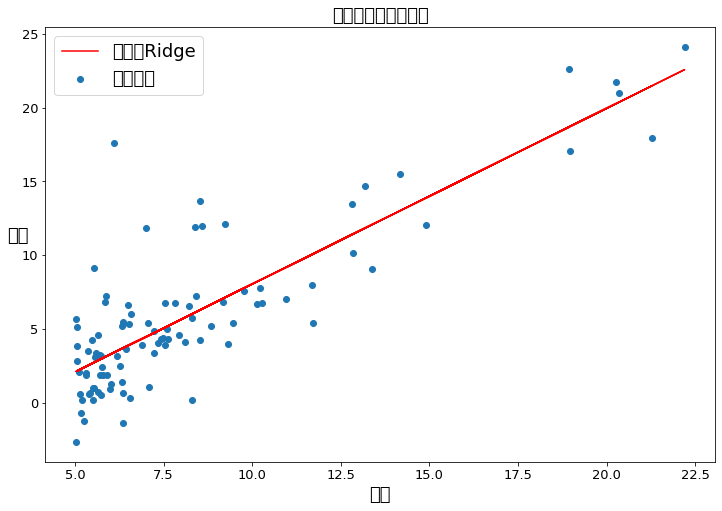

In [203]:
x2 = np.array(X[:, 1].A1)
f2 = model.predict(X).flatten()

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(x2, f2, 'r', label='预测值Ridge')
ax.scatter(data['人口'], data['收益'], label='训练数据')
ax.legend(loc=2, fontsize=18)
ax.set_xlabel('人口', fontsize=18)
ax.set_ylabel('收益', rotation=0, fontsize=18)
ax.set_title('预测收益和人口规模', fontsize=18)
plt.show()

## $L_1$正则化：
$J (  {w } ) = \frac { 1 } { 2 } \sum _ { i = 1 } ^ { m } ( h _ { w} ( x ^ { ( i ) } ) - y ^ { ( i ) } ) ^ { 2 } + \lambda \sum _ { j = 1 } ^ { n } | w _ { j } |$，此时称作`Lasso Regression` 

In [204]:
from sklearn.linear_model import Lasso
model = Lasso()
model.fit(X, y)

Lasso()

/Users/zhangzilun/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 39044 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/zhangzilun/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 27979 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/zhangzilun/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 25910 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/zhangzilun/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 30410 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/zhangzilun/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 21644 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/zhangzilun/opt/anaconda3/lib/pyth

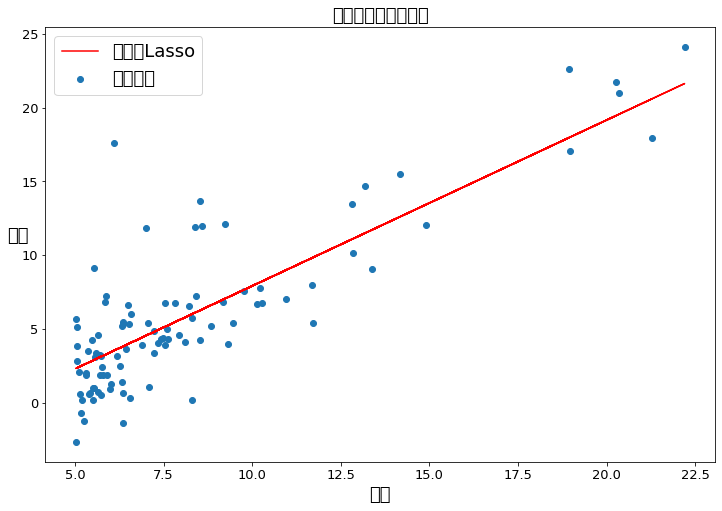

In [205]:
x3= np.array(X[:, 1].A1)
f3 = model.predict(X).flatten()

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(x3, f3, 'r', label='预测值Lasso')
ax.scatter(data['人口'], data['收益'], label='训练数据')
ax.legend(loc=2, fontsize=18)
ax.set_xlabel('人口', fontsize=18)
ax.set_ylabel('收益', rotation=0, fontsize=18)
ax.set_title('预测收益和人口规模', fontsize=18)
plt.show()

## 最小二乘法(LSM)：

最小二乘法的需要求解最优参数$w^{*}$：

已知：目标函数

$J\left( w  \right)=\frac{1}{2m}\sum\limits_{i=1}^{m}{{{\left( {h}\left( {x^{(i)}} \right)-{y^{(i)}} \right)}^{2}}}$

其中：${h}\left( x \right)={w^{T}}X={w_{0}}{x_{0}}+{w_{1}}{x_{1}}+{w_{2}}{x_{2}}+...+{w_{n}}{x_{n}}$

将向量表达形式转为矩阵表达形式，则有$J(w )=\frac{1}{2}{{\left( Xw -y\right)}^{2}}$ ，其中$X$为$m$行$n+1$列的矩阵（$m$为样本个数，$n$为特征个数），$w$为$n+1$行1列的矩阵(包含了$w_0$)，$y$为$m$行1列的矩阵，则可以求得最优参数$w^{*} ={{\left( {X^{T}}X \right)}^{-1}}{X^{T}}y$ 

梯度下降与最小二乘法的比较：

梯度下降：需要选择学习率$\alpha$，需要多次迭代，当特征数量$n$大时也能较好适用，适用于各种类型的模型	

最小二乘法：不需要选择学习率$\alpha$，一次计算得出，需要计算${{\left( {{X}^{T}}X \right)}^{-1}}$，如果特征数量$n$较大则运算代价大，因为矩阵逆的计算时间复杂度为$O(n^3)$，通常来说当$n$小于10000 时还是可以接受的，只适用于线性模型，不适合逻辑回归模型等其他模型

In [206]:
def LSM(X, y):
    w = np.linalg.inv(X.T@X)@X.T@y#X.T@X等价于X.T.dot(X)
    return w

In [207]:
final_w2=LSM(X, y)#感觉和批量梯度下降的theta的值有点差距
final_w2

matrix([[-3.89578088],
        [ 1.19303364]])

In [44]:
#梯度下降得到的结果是matrix([[-3.24140214,  1.1272942 ]])